<a href="https://colab.research.google.com/github/Abhinavpanjiyar1/Pytorch/blob/main/PYTORCH_ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt


In [20]:
train_dataset = torchvision.datasets.MNIST(root='.',
                                           train = True,
                                           transform = transforms.ToTensor(),
                                           download = True
                                           )


In [21]:
train_dataset.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [22]:
train_dataset.data.max()

tensor(255, dtype=torch.uint8)

In [23]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [24]:
train_dataset.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [25]:
test_dataset = torchvision.datasets.MNIST(root = '.',
                                    train = False,
                                    transform =transforms.ToTensor(),
                                      download = True)
test_dataset.data.shape

torch.Size([10000, 28, 28])

In [26]:
#build the model
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 10)
                      )

In [27]:
device = torch.device("cuda" if torch.cuda.is_available else "cpu")
print(device)
model.to(device)

cuda


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [28]:
#loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())


In [29]:
#data loader
batch_size = 128
train_loader = torch.utils.data.DataLoader(dataset= train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = batch_size,
                                          shuffle = False)


In [30]:
# check what the dataloader does
tmp_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                         batch_size = 1,
                                         shuffle = True)

for x, y in tmp_loader:
  print(x)
  print(x.shape)
  print(y.shape)

Streaming output truncated to the last 5000 lines.
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0196, 0.3961, 0.5098, 

In [31]:
train_dataset.transform(train_dataset.data.numpy()).max()


tensor(1.)

In [32]:
#train the model
n_epochs = 10

#stuff to store
train_losses = np.zeros(n_epochs)
test_losses  = np.zeros(n_epochs)
for it in range (n_epochs):
  train_loss=[] # initialize train_loss for each epoch
  for inputs, targets in train_loader: # iterate through train_loader
    # move data to gpu
    inputs, targets = inputs.to(device), targets.to(device)

    # reshape the input
    inputs = inputs.view(-1, 784)

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)


    #backward and optimize
    loss.backward()
    optimizer.step()

    train_loss.append(loss.item())

  #get train loss and test loss

  train_loss = np.mean(train_loss)

  test_loss=[]
  for inputs, targets in test_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    inputs = inputs.view(-1, 784)
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    test_loss.append(loss.item())
  test_loss = np.mean(test_loss)


  #save losses
  train_losses[it] = train_loss
  test_losses[it] = test_loss
  print(f'Epoch {it +1}/{n_epochs}, train_loss : {train_loss:.4f}, Test_loss: {test_loss}')

Epoch 1/10, train_loss : 0.4177, Test_loss: 0.22748682256552238
Epoch 2/10, train_loss : 0.1974, Test_loss: 0.16082193529752048
Epoch 3/10, train_loss : 0.1430, Test_loss: 0.12778356943067304
Epoch 4/10, train_loss : 0.1096, Test_loss: 0.11037079397518235
Epoch 5/10, train_loss : 0.0888, Test_loss: 0.09562011790620989
Epoch 6/10, train_loss : 0.0731, Test_loss: 0.09287941622506544
Epoch 7/10, train_loss : 0.0611, Test_loss: 0.08350357109506885
Epoch 8/10, train_loss : 0.0522, Test_loss: 0.08266898233935685
Epoch 9/10, train_loss : 0.0441, Test_loss: 0.07787674894671345
Epoch 10/10, train_loss : 0.0371, Test_loss: 0.07671556818738132


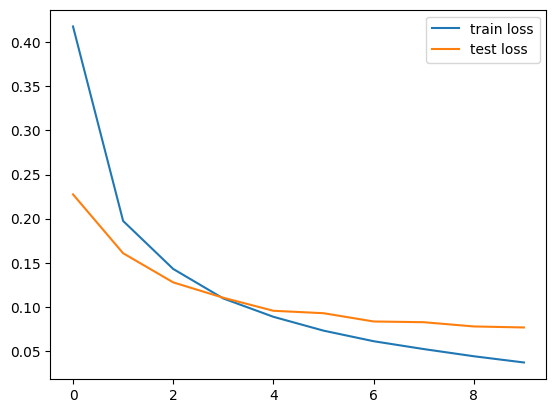

In [33]:
# plot the train loss and test loss per iteration
plt.plot(train_losses, label = 'train loss')
plt.plot(test_losses, label = 'test loss')
plt.legend()
plt.show()


In [35]:
n_correct = 0.
n_total = 0.
for inputs, targets in train_loader: # iterate through train_loader
  # move data to gpu
  inputs, targets = inputs.to(device), targets.to(device)

  # reshape the input
  inputs = inputs.view(-1, 784)

  # forward pass
  outputs = model(inputs)

  # get prediction
  _,predictions =torch.max(outputs, 1)

  # update count
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0] # accumulate total count

train_acc = n_correct / n_total

n_correct = 0.
n_total = 0.
for inputs, targets in test_loader: # iterate through test_loader, not train_loader
  # move data to gpu
  inputs, targets = inputs.to(device), targets.to(device)

  # reshape the input
  inputs = inputs.view(-1, 784)

  # forward pass
  outputs = model(inputs)

  # get prediction
  _,predictions =torch.max(outputs, 1)

  # update count
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0] # accumulate total count

test_acc = n_correct / n_total
print(f'Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}')

Train acc: 0.9934, Test acc: 0.9763
